## Data Cleaning

In [67]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#  Import and read the cancer patient data sets.csv.
import pandas as pd 
cancer_df = pd.read_csv("resources/cancer_patient_data_sets.csv")
cancer_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# Make sure text in "Level" column is capitalized 
cancer_df['Level'] = cancer_df['Level'].str.capitalize()

In [5]:
# Convert "Level" categorical data to numeric

# Convert "Level" categorical data to numeric

# Transform Level
def LevelCat(level):
    if level == "Low":
        return 0
    elif level == "Medium":
        return 1
    else:
        return 2

# Along with replace() and map(), this is another way to encode the gender column into numbers.
cancer_df['Level'] = cancer_df['Level'].apply(LevelCat)
cancer_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [6]:
# Drop Patient Id column
cancer_df = cancer_df.drop(['Patient Id'], axis=1)
                                      
cancer_df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [7]:
# Determine the number of unique values in each column.
cancer_df.astype('object').describe(include='all').loc['unique', :]

Age                         40
Gender                       2
Air Pollution                8
Alcohol use                  8
Dust Allergy                 8
OccuPational Hazards         8
Genetic Risk                 7
chronic Lung Disease         7
Balanced Diet                7
Obesity                      7
Smoking                      8
Passive Smoker               8
Chest Pain                   9
Coughing of Blood            9
Fatigue                      8
Weight Loss                  8
Shortness of Breath          8
Wheezing                     8
Swallowing Difficulty        8
Clubbing of Finger Nails     9
Frequent Cold                7
Dry Cough                    7
Snoring                      7
Level                        3
Name: unique, dtype: int64

## Model dataframe with unbinned ages

In [8]:
# Split our preprocessed data into our features and target arrays
X = cancer_df.drop(['Level'], axis=1)
y = cancer_df['Level']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


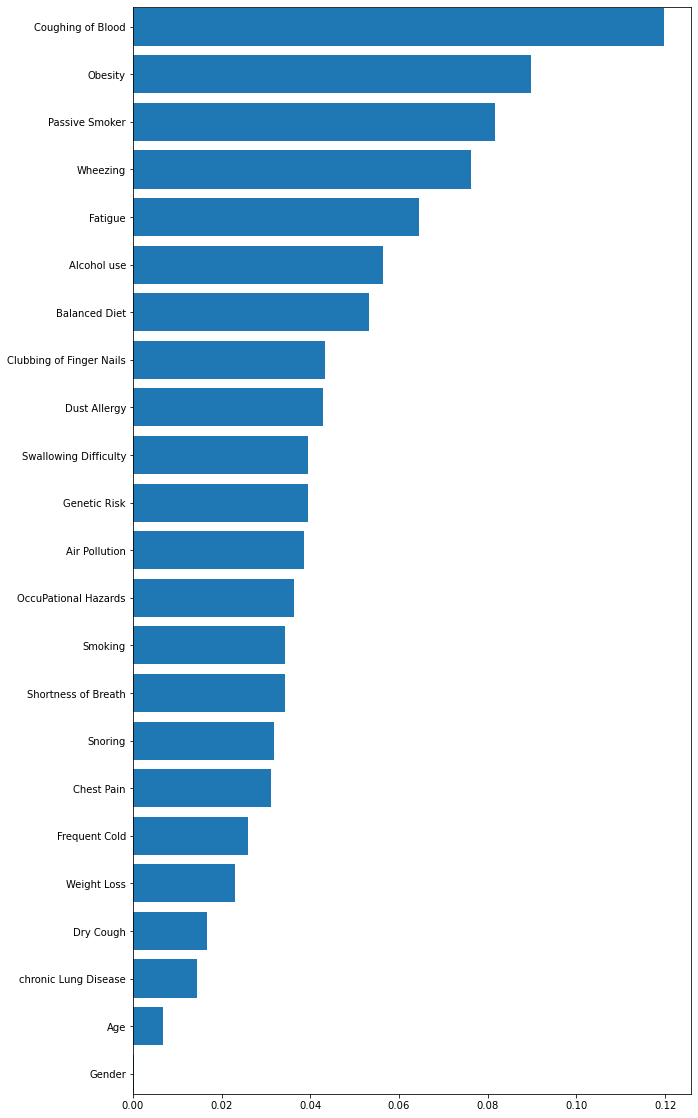

In [48]:
# Visualize important features
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

## Model dataframe with binned ages

In [21]:
# Copy dataframe
# cancer_df has numerical values for age
# cancer2 will have age categories (0: 0-17, 1: 18+)
cancer2 = cancer_df.copy()

In [22]:
# Categorize Age data as child (0-17) or adult (18+)

# Transform age column
def ageBin(age):
    if age < 18:
        return 0
    else:
        return 1

# Along with replace() and map(), this is another way to encode the gender column into numbers.
cancer2["Age"] = cancer2["Age"].apply(ageBin)
cancer2.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,1,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,0,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,1,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,1,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,1,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [60]:
# Split our preprocessed data into our features and target arrays
X = cancer2.drop(['Level'], axis=1)
y = cancer2['Level']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [61]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 1.0


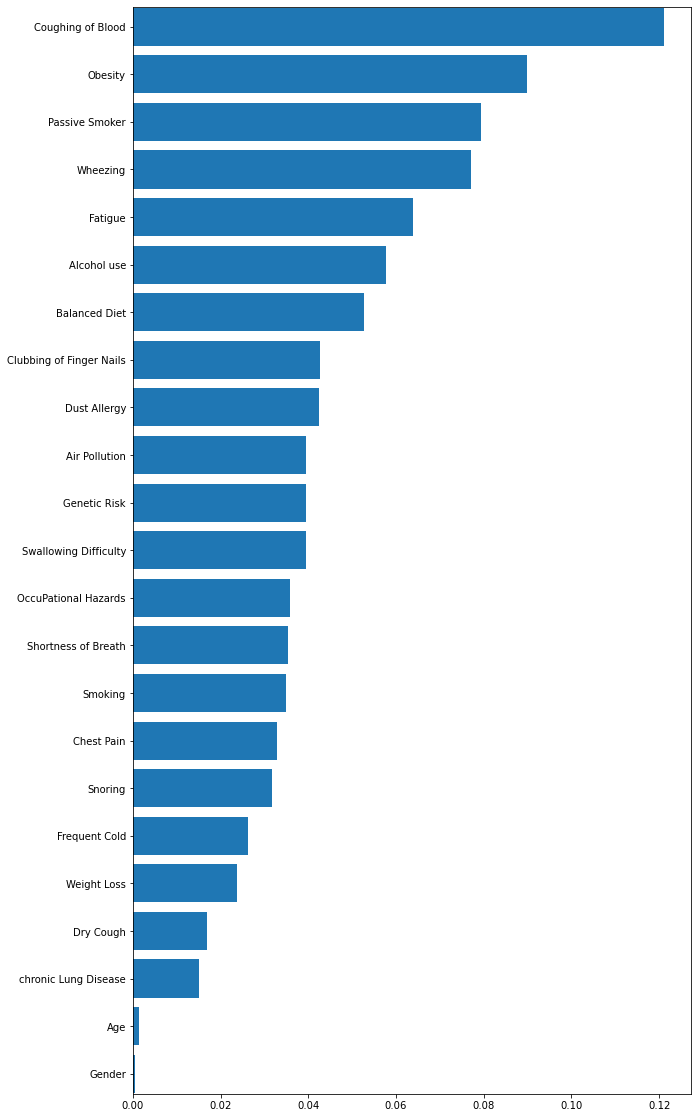

In [62]:
# Visualize important features
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [65]:
# Make predictions for the test set
y_pred_test = clf.predict(X_test)

In [68]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

1.0

In [69]:
cancer2.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [70]:
# Re-run model with the top 6 most important features + air pollution

# Split our preprocessed data into our features and target arrays
X = cancer2.drop(['Age', 'Gender', 'Air Pollution','Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Smoking', 'Chest Pain',
       'Weight Loss', 'Shortness of Breath',
       'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'], axis=1)
y = cancer2['Level']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [71]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [72]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[77,  0,  0],
       [ 0, 88,  0],
       [ 0,  0, 85]], dtype=int64)